# Pre-processing data
https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-1-7d0ad817fca5

In [13]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
# Visuals
# import seaborn as sns
# from scipy import stats
# %matplotlib inline

**Read in Data**
- NOTE: Dropping spatial variables for the scope of project
- Also, there was little correlation with spatial components in preliminary dummy coding correlation check

In [14]:
# Read data and assign NA to missing values
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                   sep='\s*,\s*',encoding='latin-1',engine='python', na_values=["?"])


data.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

In [15]:
# Drop spatial variables
data = data.drop(columns=['countyCode', 'communityCode', 'communityname', 'state'])

**Check data**
- NOTE: We have no categorical or string data.

In [16]:
data.head(5)

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
1,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
2,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
3,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
4,1,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.0,88.72,442.95,6867.42


In [17]:
data.shape

(2214, 143)

In [18]:
data.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2214.000000,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2123.000000,2123.000000,1993.000000,2117.000000
mean,5.496387,5.313657e+04,2.707150,9.338699,83.976296,2.668473,7.952918,14.446730,27.647642,13.976518,...,761.574853,1033.845663,2138.533695,3373.992673,516.919041,474.120629,30.921338,32.161098,589.353914,4909.901535
std,2.871984,2.046646e+05,0.334091,14.249369,16.421952,4.474113,14.592557,4.519448,6.181506,5.971745,...,3112.366074,763.276945,7602.173806,1901.148488,3258.883890,504.727524,180.166592,39.248657,614.816135,2739.290947
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,3.000000,1.437125e+04,2.500000,0.860000,76.310000,0.620000,0.930000,12.250000,24.420000,11.320000,...,95.000000,512.185000,392.500000,2040.740000,30.000000,157.060000,1.000000,7.670000,161.730000,2921.280000
50%,5.000000,2.280300e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,26.780000,12.545000,...,205.000000,822.890000,747.000000,3081.290000,75.000000,303.090000,5.000000,21.110000,374.070000,4426.270000
75%,8.000000,4.304350e+04,2.850000,11.157500,96.227500,2.670000,7.810000,15.360000,29.207500,14.347500,...,508.000000,1351.095000,1675.000000,4335.630000,233.000000,589.780000,16.000000,42.865000,794.410000,6230.240000
max,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,70.510000,63.620000,...,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [19]:
# Print the value counts for categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(data[col].value_counts())

# There are none

**Addressing missing values**

 - If 25% of a columns data is NA, that column is removed
 - For all other missing values, the column mean is used

In [20]:
# Establish how much data is missing
data.isnull().sum().sort_values(ascending=False).head()

PctPolicAsian          1871
PolicAveOTWorked       1871
PolicCars              1871
PolicOperBudg          1871
LemasPctPolicOnPatr    1871
dtype: int64

In [21]:
variables_na = []
for i in data:
    if data[i].isnull().sum() > 554: #find the columns with large amounts of na values
        str(i)
        variables_na.append(i)
        
data = data.drop(columns=variables_na) #delete those

In [22]:
data.shape

(2214, 121)

In [23]:
# Impute the missing values using SimpleImputer in sklearn.impute
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data)
data = pd.DataFrame(data=imp.transform(data), columns=data.columns)

# Check if there is still missing data
data.isnull().sum().sort_values(ascending=False).head()

nonViolPerPop    0
PctRecImmig8     0
PctNotHSGrad     0
PctBSorMore      0
PctUnemployed    0
dtype: int64

In [24]:
data.head(5)

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,1.0,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
1,1.0,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.590000,6167.510000
2,1.0,16656.0,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,...,225.0,1301.78,716.0,4142.56,47.0,271.93,30.921338,32.161098,306.640000,4909.901535
3,1.0,11245.0,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.050000,589.353914,9988.790000
4,1.0,140494.0,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.000000,88.720000,442.950000,6867.420000


**Normalize the data set**
- Scales each column to values between 0-1 to be better interpreted by the models
- CHECK: how normalisation impacts model accuracy


In [25]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data.head()
data.describe()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,...,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,0.499599,0.005898,0.300856,0.096604,0.838538,0.045942,0.082304,0.198048,0.298833,0.158300,...,0.007657,0.085715,0.009053,0.127595,0.004587,0.094230,0.006041,0.073701,0.120842,0.177503
std,0.319109,0.027988,0.090786,0.147402,0.169386,0.077906,0.153331,0.090716,0.101121,0.101250,...,0.031352,0.064291,0.032311,0.073545,0.028958,0.101649,0.034464,0.088075,0.119603,0.099196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000597,0.244565,0.008896,0.759464,0.010273,0.008511,0.153954,0.246033,0.113259,...,0.000937,0.041806,0.001631,0.076008,0.000258,0.030337,0.000195,0.018293,0.038042,0.106590
50%,0.444444,0.001750,0.288043,0.029689,0.904281,0.020895,0.021645,0.181453,0.284639,0.134028,...,0.002046,0.068003,0.003145,0.116325,0.000658,0.059786,0.001172,0.051287,0.091446,0.165324
75%,0.777778,0.004518,0.339674,0.115418,0.964905,0.045969,0.080803,0.216379,0.324350,0.164590,...,0.005138,0.112280,0.007089,0.164794,0.002072,0.117481,0.003516,0.094971,0.148042,0.221616
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Check target variable**
- Distribution
- Percentiles

In [26]:
# Check
data['ViolentCrimesPerPop'].value_counts()
data['ViolentCrimesPerPop'].describe()

count    2214.000000
mean        0.120842
std         0.119603
min         0.000000
25%         0.038042
50%         0.091446
75%         0.148042
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

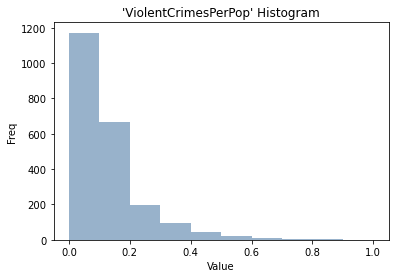

In [38]:
# Plot
def histo_plot(x):
    plt.hist(x, color=(0.2, 0.4, 0.6, 0.6), alpha=0.5)
    plt.title("'{var_name}' Histogram".format(var_name=x.name))
    plt.ylabel("Freq")
    plt.xlabel("Value")
    plt.show()
histo_plot(data['ViolentCrimesPerPop'])

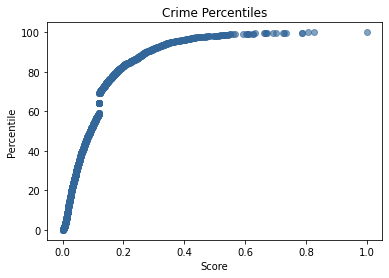

In [39]:
# # Crime percentiles
# data['percentile'] = data['ViolentCrimesPerPop'].apply(lambda x: percentileofscore(data['ViolentCrimesPerPop'], x))
#
# # Plot percentiles for crime
# plt.figure(figsize = (6, 4))
# plt.plot(data['ViolentCrimesPerPop'], data['percentile'], 'o')
# plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
# plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('Crime Percentiles');
#
# data = data.drop(columns=['percentile'])

**Add a Crime Classification column**
- Using column quartiles as a suitable threshold base
- CHECK: how classification complexity impacts models
- NOTE: Using +3 classes would be more informative in our model explorations

In [29]:
# 3 fold classification based on quartiles
data['HighCrime'] = pd.qcut(data['ViolentCrimesPerPop'], 3, [0, 1, 2]) # where 0 = LowCrime, 1 = MediumCrime, 2 = HighCrime
# Binary Classification
data['HighCrime'] = [0 if x < 2 else 1 for x in data['HighCrime']]

# Reformat column
data['HighCrime'] = data['HighCrime'].astype(float)

**Check Variable Correlations**
- No dummy encoding needed because we have no categorical variables

In [30]:
# Correlations of numerical values
data.corr()['HighCrime'].sort_values()

PctKids2Par           -0.594917
racePctWhite          -0.567260
PctFam2Par            -0.550897
PctYoungKids2Par      -0.528323
pctWInvInc            -0.516999
                         ...   
robbbPerPop            0.567220
burglPerPop            0.572936
assaultPerPop          0.658918
ViolentCrimesPerPop    0.748396
HighCrime              1.000000
Name: HighCrime, Length: 122, dtype: float64

**Select Top 100 correlated features for analysis**
- Split data into Training, Testing and Validation sets
- CHECK: how feature complexity impacts model accuracy
- NOTE: When variables <=75 or >=125, the models seems to do worse. 100 seems like a good point to avoid curse of dimensionality.

In [31]:
def format_data(df):
    '''
    Takes in a dataframe, finds the most correlated variables with crime and
    returns training and testing datasets
    '''
    # Drop other predictor variables from features
    df = df.drop(columns=['ViolentCrimesPerPop', 'murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','nonViolPerPop'])

    # Find correlations with the Crime
    most_correlated = df.corr().abs()['HighCrime'].sort_values(ascending=False)

    # Maintain the top 100 most correlation features with Crime
    most_correlated = most_correlated[:101]
    df = df.loc[:, most_correlated.index]

    # split data into x & y
    y = df['HighCrime']
    x = df.drop(columns=['HighCrime'])

    return df, x, y

In [36]:
# Format data
df, x, y = format_data(data)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [37]:
print(x_train.shape)
print(x_test.shape)

(1549, 100)
(665, 100)


**Visualise Exploratory Analysis**
- Correlation coefficients
- Distribution by crime category
- NOTE: These visuals work best with no more than 10 features - make sure to set the format_data feature selection to 11

In [34]:
# # CORRELATION COEFFICIENTS
# def corrfunc(x, y, **kws):
#     r, _ = stats.pearsonr(x, y)
#     ax = plt.gca()
#     ax.annotate("r = {:.2f}".format(r),
#                 xy=(.1, .6), xycoords=ax.transAxes,
#                size = 24)
#
# cmap = sns.cubehelix_palette(light=1, dark = 0.1,
#                              hue = 0.5, as_cmap=True)
#
# sns.set_context(font_scale=2)
#
# # Pair grid set up
# g = sns.PairGrid(x_train)
#
# # Scatter plot on the upper triangle
# g.map_upper(plt.scatter, s=10, color = 'red')
#
# # Distribution on the diagonal
# g.map_diag(sns.distplot, kde=False, color = 'red')
#
# # Density Plot and Correlation coefficients on the lower triangle
# g.map_lower(sns.kdeplot, cmap = cmap)
# g.map_lower(corrfunc);
#

In [35]:
# # VARIABLE DISTRIBUTION BY CRIME CATEGORY
# # Create relation to the Q3 of Crime column
# X_plot = df.copy()
# X_plot['relation_Q3'] = (X_plot['HighCrime'] >= 2)
# X_plot['relation_Q3'] = X_plot['relation_Q3'].replace({True: 'above', False: 'below'})
# X_plot = X_plot.drop(columns=['HighCrime'])
#
# plt.figure(figsize=(12, 12))
# # Plot the distribution of each variable colored
# # by the relation to the median grade
# for i, col in enumerate(X_plot.columns[:-1]):
#     plt.subplot(5, 2, i + 1)
#     subset_above = X_plot[X_plot['relation_Q3'] == 'above']
#     subset_below = X_plot[X_plot['relation_Q3'] == 'below']
#     sns.kdeplot(subset_above[col], label = 'High crime', color = 'red')
#     sns.kdeplot(subset_below[col], label = 'Low crime', color = 'green')
#     plt.legend(); plt.title('Distribution of %s' % col)
#
# plt.tight_layout()